# データの前処理

### 欠損データへの対処

In [7]:
import pandas as pd
from io import StringIO

# StringIOは文字列をファイルのように扱える
# サンプルデータ作成
csv_data = """A, B, C, D
              1.0, 2.0, 3.0, 4.0
              5.0, 6.0,, 8.0
              10.0, 11.0, 12.0,"""
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [8]:
df.isnull().sum()

A     0
 B    0
 C    1
 D    1
dtype: int64

In [9]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [10]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [11]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [13]:
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values ="NaN", strategy="mean", axis=0)
imr = imr.fit(df.values)

imputed_data = imr.transform(df.values)
imputed_data

C:\Users\kaai\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [69]:
df = pd.DataFrame([
    ["green", "M", 10.1, "class1"],
    ["red", "L", 13.5, "class2"],
    ["blue", "XL", 15.3, "class1"]])

df.columns = ["color", "size", "price", "classlabel"]
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [70]:
# Tシャツのサイズと整数を対応させるディクショナリを生成
size_mapping = {"XL" : 3, "L" : 2, "M" : 1}
# Tシャツのサイズを整数に変換
df["size"] = df["size"].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [71]:
inv_size_mapping  = {v: k for k, v in size_mapping.items()}

df["size"].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [72]:
import numpy as np

# クラスラベルと整数を対応させるディクショナリを生成
class_mapping = {a:idx for idx, a in enumerate(np.unique(df["classlabel"]))}
class_mapping

{'class1': 0, 'class2': 1}

In [73]:
# クラスラベルを整数に変換
df["classlabel"] = df["classlabel"].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [74]:
# 整数とクラスラベルを対応させるディクショナリを生成
inv_class_mapping = {v:k for k, v in class_mapping.items()}
# 整数からクラスラベルに変換
df["classlabel"] = df["classlabel"].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [75]:
from sklearn.preprocessing import LabelEncoder
# ラベルエンコーダのインスタンスを生成
class_le = LabelEncoder()
# クラスラベルから整数に変換
y = class_le.fit_transform(df["classlabel"].values)
y

array([0, 1, 0])

In [76]:
# クラスラベルを文字列に戻す
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [77]:
# Tシャツの色、サイズ、価格を抽出
X = df[["color", "size", "price"]].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [78]:
from sklearn.preprocessing import OneHotEncoder

# One-Hotエンコーダの生成
ohe = OneHotEncoder(categorical_features=[0])
# One-Hotエンコーディング実行
ohe.fit_transform(X).toarray()

C:\Users\kaai\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\kaai\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [79]:
# one=hotエンコーディング実行
pd.get_dummies(df[["price", "color", "size"]])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [80]:
# one-hotエンコーディング実行で最初の列を削除
pd.get_dummies(df[["price", "color", "size"]], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [82]:
# Numpy配列から列を削除する
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()[:, 1:]

C:\Users\kaai\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\kaai\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [99]:
# 新しくWineデータセットを読み込む

# SSL認証が下りなかったので、sslをimportして、開発環境にアクセスした
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

In [100]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
print('Class labels', np.unique(df_wine['Class label']))  # クラスラベルを表示
print()
print(df_wine.head())  # 先頭から5行を表示
print()

Class labels [1 2 3]

   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04          

In [101]:
from sklearn.model_selection import train_test_split

# 特徴量とクラスラベルを別々に抽出
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
#トレーニングデータとテストデータに分割
# 全体の30%をテストデータにする
X_train, X_test, y_train, y_test = train_test_split
(X, y, test_size=0.3, random_state=0, stratify=y)

In [104]:
from sklearn.preprocessing import MinMaxScaler

# min-maxスケーリングのインスタンス生成
mms = MinMaxScaler()
# トレーニングデータを変換
X_train_norm = mms.fit_transform(X_train)
# テストデータを変換
X_test_norm =mms.transform(X_test)

In [107]:
# 標準化と正規化
ex = np.array([0 ,1, 2, 3, 4, 5])

ex_std = (ex - ex.mean())/ex.std()
print("ex_std :", ex_std)
ex_nor = (ex - ex.min())/(ex.max() - ex.min())
print("ex_normarized :", ex_nor)

ex_std : [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
ex_normarized : [0.  0.2 0.4 0.6 0.8 1. ]


In [111]:
from sklearn.preprocessing import StandardScaler

# 標準化インスタンスを生成
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [108]:
from sklearn.linear_model import LogisticRegression

# L1正則化ロジスティック回帰のインスタンスを生成
LogisticRegression(penalty="l1")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
# L1正則化ロジスティック回帰のインスタンスを生成（逆正則化パラメータ C=1.0
lr = LogisticRegression(penalty="l1", C=1.0)

# トレーニングデータに適合
lr.fit(X_train_std, y_train)
print("Traning accuracy:", lr.score(X_train_std, y_train))
print("Test accuracy:", lr.score(X_test_std, y_test))

C:\Users\kaai\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kaai\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Traning accuracy: 1.0
Test accuracy: 1.0


In [113]:
lr.intercept_

array([-1.26293529, -1.21597229, -2.37045044])

In [114]:
lr.coef_

array([[ 1.24530855,  0.18054227,  0.74162427, -1.15942174,  0.        ,
         0.        ,  1.17438304,  0.        ,  0.        ,  0.        ,
         0.        ,  0.5418656 ,  2.51134898],
       [-1.53711301, -0.38731254, -0.99542412,  0.3651971 , -0.05938676,
         0.        ,  0.66786301,  0.        ,  0.        , -1.93429165,
         1.23347293,  0.        , -2.23140216],
       [ 0.13571571,  0.16845933,  0.35719594,  0.        ,  0.        ,
         0.        , -2.43813525,  0.        ,  0.        ,  1.56371083,
        -0.81851852, -0.49279914,  0.        ]])

In [115]:
lr.coef_[1]

array([-1.53711301, -0.38731254, -0.99542412,  0.3651971 , -0.05938676,
        0.        ,  0.66786301,  0.        ,  0.        , -1.93429165,
        1.23347293,  0.        , -2.23140216])

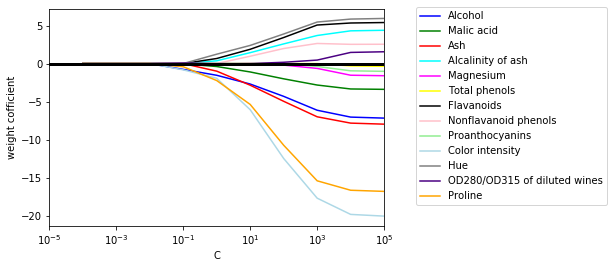

In [130]:
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt

# 描画の準備
fig = plt.figure()
ax = plt.subplot(111)
# 各係数の色のリスト
colors = ["blue", "green", "red", "cyan", "magenta", "yellow", "black", "pink", "lightgreen", "lightblue", "gray", "indigo", "orange"]
# 空のリストを生成（重み係数、逆正則化パラメータ）
weights, params = [], []
# 逆正則化パラメータの値ごとに処理
for c in np.arange(-4, 6.):
    lr = LogisticRegression(penalty="l1", C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

# 重み配列をNumpy配列に変換
weights = np.array(weights)
# 各重み係数をプロット
for column, color in zip(range(weights.shape[1]), colors):
    # 横軸を逆正則パラメータ、縦軸を重み係数とした折れ線グラフ
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)
    
# y=0に黒い波線を引く
plt.axhline(0, color="black", linestyle="-", linewidth=3)
# 横軸の範囲の設定
plt.xlim([10**(-5), 10**5])
# 軸の範囲の設定
plt.ylabel("weight cofficient")
plt.xlabel("C")
# 横軸を対数スケールに設定
plt.xscale("log")
plt.legend(loc="upper left")
ax.legend(loc="upper center", bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

### SBS(遂次後退選択)アルゴリズム

In [141]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    """
    遂次後退選択(SBS)を実行するクラス
    """
    
    def __init__(self, estimater, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring               # 特徴量を評価する指標
        self.estimator = clone(estimator)    # 推定器
        self.k_features = k_features         # 選択する特徴量の個数
        self.test_size = test_size           # テストデータの割合
        self.random_state = random_state     # 乱数種を固定するrandom_state
        
    def fit(self, X, y):
        # トレーニングデータとテストデータに分割
        X_train, X_test, y_train, y_test = tarin_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        # すべての特徴量の個数、列インデックス
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subset_ = [self.indices_]
        # すべての特徴量を用いてスコアを算出
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        # スコアを格納
        self.scores_ = [score]
        # 指定した特徴量の個数になるまで処理を反復
        while dim > self.k_features:
            # 空のリストの生成(スコア、列インデックス)
            scores = []
            subsets = []
            
            # 特徴量の部分集合を表す列インデックスの組み合わせごとに処理を反復
            for p in combinations(self.indices_, r=dim -1):
                # スコアを算出して格納
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                # 特徴量の部分集合を表す列インデックスのリストを変換
                subsets.append(p)
                
            # 最良のスコアのインデックスを抽出
            best = np.argmax(scores)
            # 最良のスコアとなる列インデックスを抽出して格納
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            # 特徴量の個数を1つだけ減らして次のステップへ
            dim = -1
            
            # スコアを格納
            self.scores_.append(scores[best])
            
        # 最後に格納したスコア
        self.k_score_ = self.scores_[-1]
            
        return self
        
    def transform(self, X):
        # 抽出した特徴量を返す
        return X[:, self.indces_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        # 指定された列番号indicesの特徴量を抽出してモデルを適合
        self.estimator.fit(X_train[:, indices, y_train])
        # テストデータを用いてクラスラベルを予測
        y_pred = self.estimator.predict(X_test[:, indices])
        # 真のクラスラベルと予測値を用いてスコアを算出
        score = self.scoring(y_test, y_pred)
        return score

In [143]:
# KNN分類器を使ってSBS実装をする
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# k近傍法分類器のインスタンスを生成(近傍点数＝5)
knn = KNeighborsClassifier(n_neighbors=5)
# 遂次後退選択のインスタンスを生成(特徴量の個数が1になるまで特徴量を選択)
sbs = SBS(knn, k_features=1)
# 遂次後退選択を実行
sbs.fit(X_train_std, y_train)

NameError: name 'estimator' is not defined

In [144]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [145]:
# KNN分類器を使ってSBS実装をする
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# k近傍法分類器のインスタンスを生成(近傍点数＝5)
knn = KNeighborsClassifier(n_neighbors=5)
# 遂次後退選択のインスタンスを生成(特徴量の個数が1になるまで特徴量を選択)
sbs = SBS(knn, k_features=1)
# 遂次後退選択を実行
sbs.fit(X_train_std, y_train)

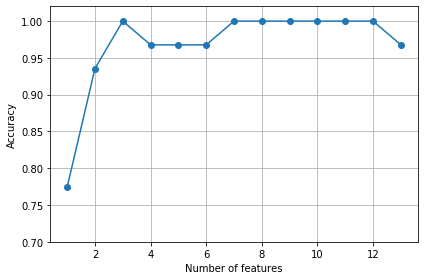

In [153]:
# 特徴量の個数のリスト(13, 12, ...., 1)
k_feat = [len(k) for k in sbs.subsets_]
# 横軸を特徴量の個数、縦軸をスコアとした折れ線グラフのプロット
plt.plot(k_feat, sbs.scores_, marker="o")
plt.ylim([0.7, 1.02])
plt.ylabel("Accuracy")
plt.xlabel("Number of features")
plt.grid() # グリッド線
plt.tight_layout()
plt.show()

In [155]:
print(sbs.subsets_)

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12), (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11), (0, 1, 2, 3, 4, 5, 6, 7, 9, 11), (0, 1, 2, 3, 4, 5, 7, 9, 11), (0, 1, 2, 3, 5, 7, 9, 11), (0, 1, 2, 3, 5, 7, 11), (0, 1, 2, 3, 5, 11), (0, 1, 2, 3, 11), (0, 1, 2, 11), (0, 1, 11), (0, 11), (0,)]


In [154]:
# k=3の特徴部分集合をみてみる
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [156]:
# 13個すべての特徴量を用いてモデルを適合
knn.fit(X_train_std, y_train)
# トレーニングの正解率を出力
print("Traning accuracy: ", knn.score(X_train_std, y_train))
# テストの正解率
print("Test accuracy: ", knn.score(X_test_std, y_test))

Traning accuracy:  0.967741935483871
Test accuracy:  0.9629629629629629


In [157]:
# 3つの特徴量を用いてモデルを適合
knn.fit(X_train_std[:, k3], y_train)
print("Traning accuracy:", knn.score(X_train_std[:, k3], y_train))
print("Test accuracy:", knn.score(X_test_std[:, k3], y_test))

Traning accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


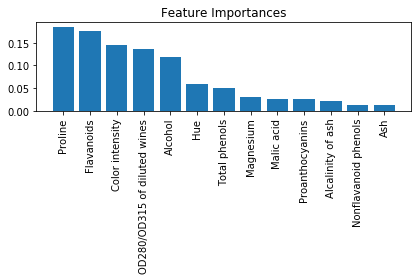

In [167]:
from sklearn.ensemble import RandomForestClassifier

# Wineデータセットの特徴量の名称
feat_labels = df_wine.columns[1:]
# ランダムフォレストオブジェクトの生成(決定着の個数=500)
forest = RandomForestClassifier(n_estimators=500, random_state=1)
# モデルを適合
forest.fit(X_train, y_train)
# 特徴量の重要度を抽出
importances = forest.feature_importances_
# 重要度の降順で特徴量のインデックスを抽出
indices = np.argsort(importances)[::-1]
# 重要度の降順で特徴量の名称、重要度を表示
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [172]:
from sklearn.feature_selection import SelectFromModel
# 特徴選択オブジェクトを生成(重要度のしきい値を0.1に設定)
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
# 特徴量を抽出
X_selected = sfm.transform(X_train)
print("Number of features that meet this threshold criterion:", X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

Number of features that meet this threshold criterion: 5
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
